In [7]:
import sys
import csv
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

In [12]:
N = 100
df_train = pd.read_csv("train.txt",delimiter=" ",header=None)
df_train.head(10)
df_test = pd.read_csv("test.txt",delimiter=" ",header=None)
df_test.head(10)

,0,1
0,0.05,0.54
1,0.91,0.91
2,0.31,0.76
3,0.51,0.31


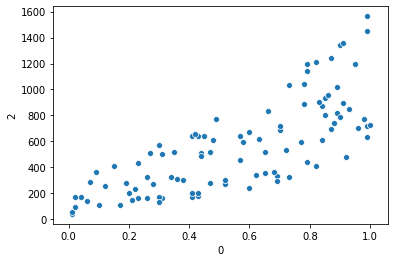

In [9]:
ax = sns.scatterplot(x=0, y=2, data=df_train)

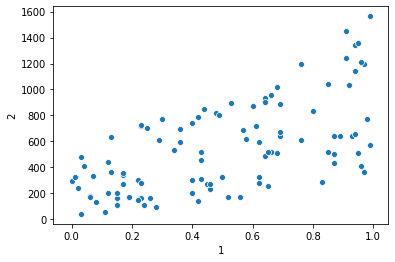

In [10]:
ax = sns.scatterplot(x=1, y=2, data=df_train)

In [19]:
X = df_train.loc[:,0:1]
y = df_train.loc[:,[2]]
y

,2
0,511.14
1,717.10
2,607.91
3,270.40
4,289.88
...,...
95,636.22
96,272.12
97,696.65
98,434.53


In [24]:
poly2 = PolynomialFeatures(degree=2).fit(X)
X2 = poly2.transform(X)

LR2 = linear_model.LinearRegression().fit(X2, y)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(LR2, X2, y, cv=5, scoring = "neg_mean_absolute_error")
print("Scores:", scores.mean())

MAX Scores: -7.200598149169778


In [25]:
poly3 = PolynomialFeatures(degree=3).fit(X)
X3 = poly3.transform(X)

LR3 = linear_model.LinearRegression().fit(X3, y)

scores = cross_val_score(LR3, X3, y, cv=5, scoring = "neg_mean_absolute_error")
print("Scores:", scores.mean())

Scores: -3.5974040564847733


In [37]:
# We are going to use order 3
X_test = poly3.transform(df_test)
pred = LR3.predict(X_test)

for a in pred:
    print(round(a[0],1))

180.4
1312.1
440.1
343.7
